In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
path = 'ex1data2.txt'
data = pd.read_csv(path,header=None, names=['x1','x2','y'])
data.head()

,x1,x2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [95]:
#特征归一化
data = (data - data.mean()) / data.std()
data.head()

,x1,x2,y
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [96]:
data.describe()

,x1,x2,y
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,3.779483e-17,2.185013e-16,-7.086530e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,3.376348e-01,1.090417e+00,3.521863e-01
max,3.117292e+00,2.404508e+00,2.874981e+00


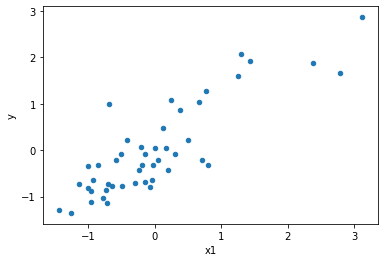

In [97]:
data.plot(kind='scatter', x='x1', y='y', figsize=(6,4))
plt.show()

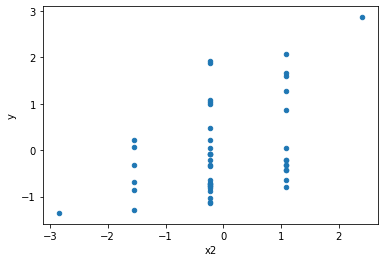

In [111]:
data.plot(kind='scatter', x='x2', y='y', figsize=(6,4))
plt.show()

In [98]:
def computerCost(X, y, theta):
    inner = np.power(((X*theta.T)-y), 2)
    return np.sum(inner) / (2 * len(X))

In [99]:
data.insert(0,'ones',1)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
X.head()

,ones,x1,x2
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [100]:
y.head()

,y
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [101]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))
theta

matrix([[0, 0, 0]])

In [102]:
computerCost(X, y, theta)

0.48936170212765967

In [103]:
theta.shape[1]

3

In [104]:
def gradientDescent(X, y, theta, alpha, iters):
    cost = np.zeros(iters)
    
    for i in range(iters):
        term = np.multiply((X*theta.T-y),X)
        error = (alpha/len(X))*np.sum(term,axis=0)
        #error = np.matrix(alpha*(np.sum((X*theta.T-y)*X,axis=0)/len(X))
        theta = theta - error
        cost[i] = computerCost(X, y, theta)
    
    return theta, cost

In [105]:
X.shape

(47, 3)

In [106]:
y.shape

(47, 1)

In [107]:
theta.shape

(1, 3)

In [108]:
alpha = 0.01
iters = 1000

In [109]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-1.10868761e-16,  8.78503652e-01, -4.69166570e-02]])

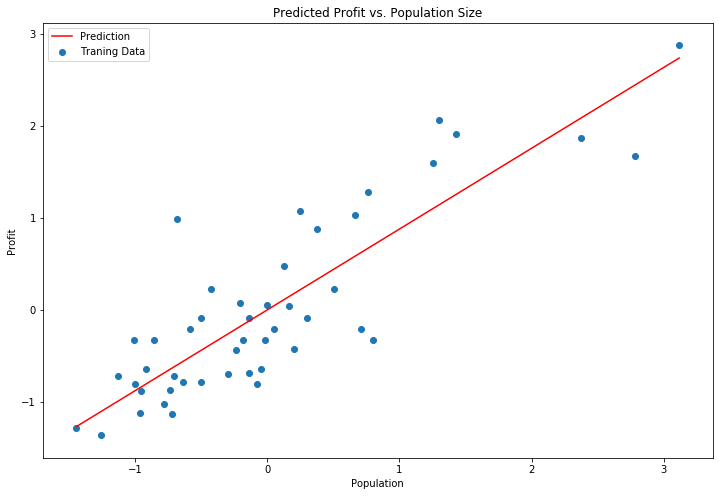

In [110]:
x = np.linspace(data.x1.min(), data.x1.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.x1, data.y, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()